In [28]:
from retinaface import RetinaFace
import cv2 
import matplotlib.pyplot as plt
from deepface import DeepFace
import matplotlib.patches as patches 

In [17]:
img_path='dataset/img.jpg'

In [18]:
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

In [24]:
obj = RetinaFace.detect_faces(img_path)
obj

{'face_1': {'score': 0.9995226263999939,
  'facial_area': [191, 175, 223, 216],
  'landmarks': {'right_eye': [204.92221, 188.17944],
   'left_eye': [219.18123, 191.87874],
   'nose': [212.04823, 199.27538],
   'mouth_right': [201.25473, 203.71756],
   'mouth_left': [213.42345, 206.83838]}},
 'face_2': {'score': 0.9993973970413208,
  'facial_area': [332, 251, 361, 290],
  'landmarks': {'right_eye': [344.1118, 265.59326],
   'left_eye': [357.37396, 267.37967],
   'nose': [351.47534, 274.05594],
   'mouth_right': [342.5639, 278.35965],
   'mouth_left': [354.9428, 279.87064]}},
 'face_3': {'score': 0.9993942975997925,
  'facial_area': [131, 208, 165, 250],
  'landmarks': {'right_eye': [146.12024, 224.04654],
   'left_eye': [160.25491, 226.2052],
   'nose': [154.18033, 234.84431],
   'mouth_right': [142.76059, 238.79352],
   'mouth_left': [155.13065, 240.86172]}},
 'face_4': {'score': 0.9993742108345032,
  'facial_area': [436, 234, 467, 272],
  'landmarks': {'right_eye': [443.3428, 248.7103

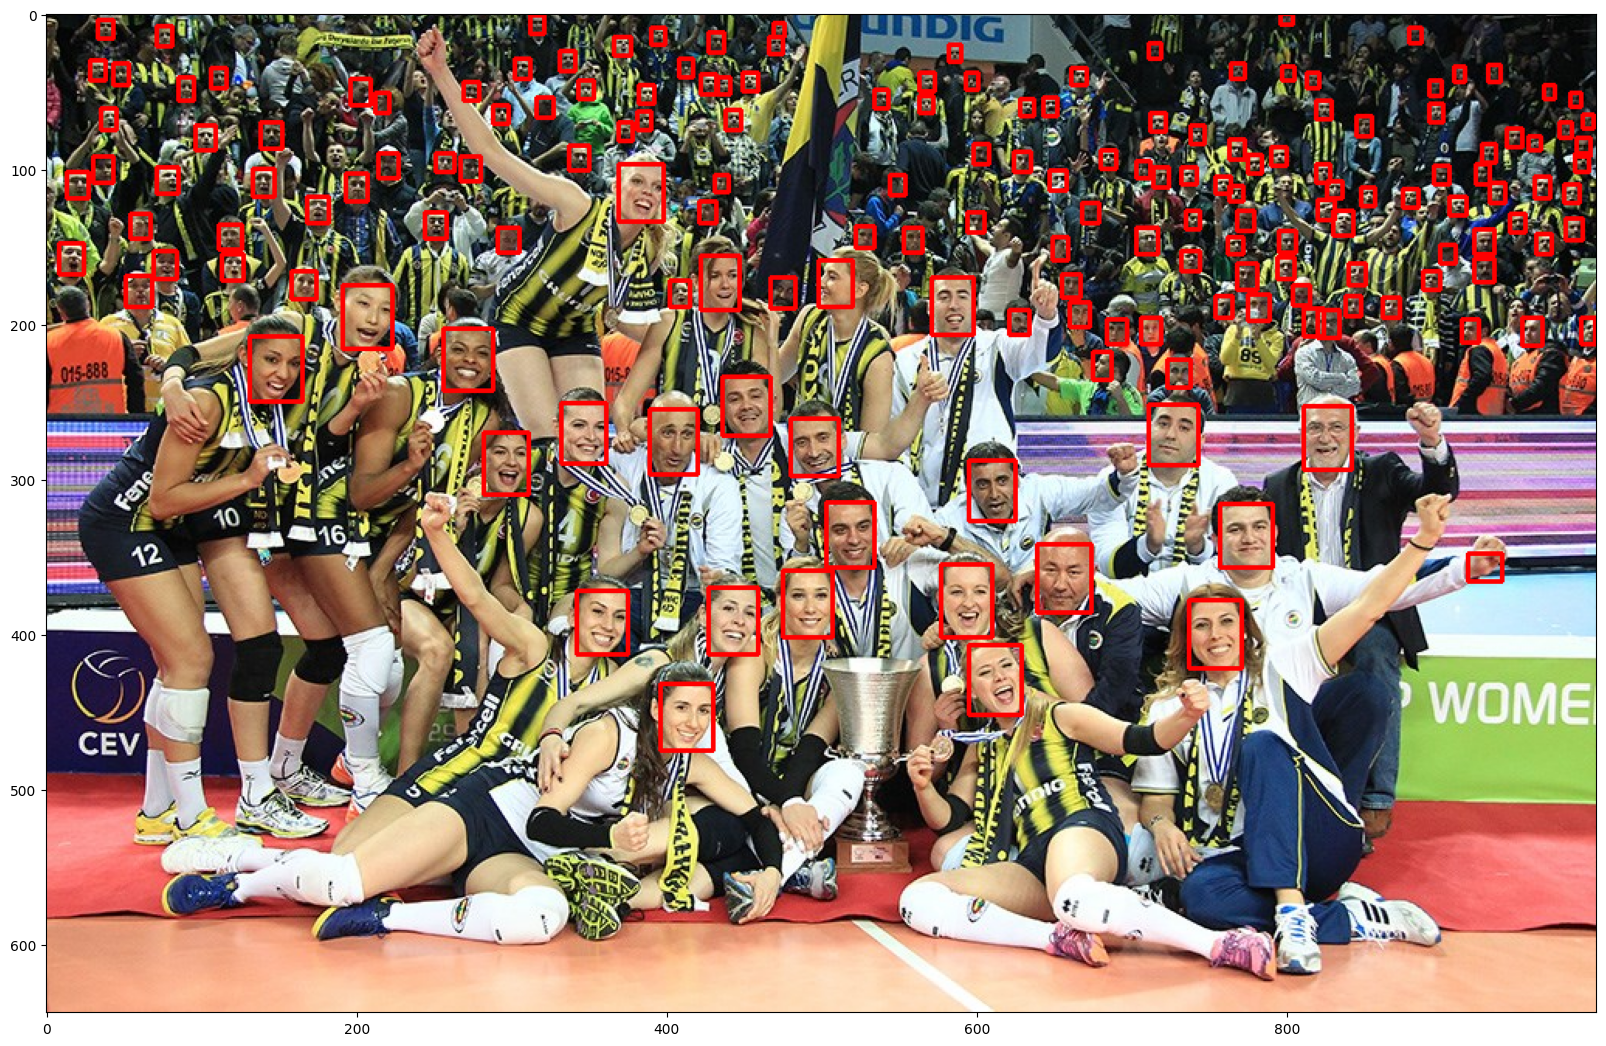

In [27]:
for key in obj.keys():
    identity=obj[key]

    facial_area=identity["facial_area"]

    cv2.rectangle(img,(facial_area[0],facial_area[1]),(facial_area[2],facial_area[3]),(255,0,0),0)

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

In [31]:
img1_path="dataset/img14.jpg"
img2_path="dataset/img13.jpg"
model="ArcFace"
detector_backend="retinaface"

In [32]:
obj = DeepFace.verify(img1_path=img1_path,img2_path=img2_path,model_name=model,detector_backend=detector_backend)
obj

{'verified': True,
 'distance': 0.26975783275471654,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 344, 'y': 71, 'w': 140, 'h': 209},
  'img2': {'x': 788, 'y': 163, 'w': 422, 'h': 628}},
 'time': 7.25}

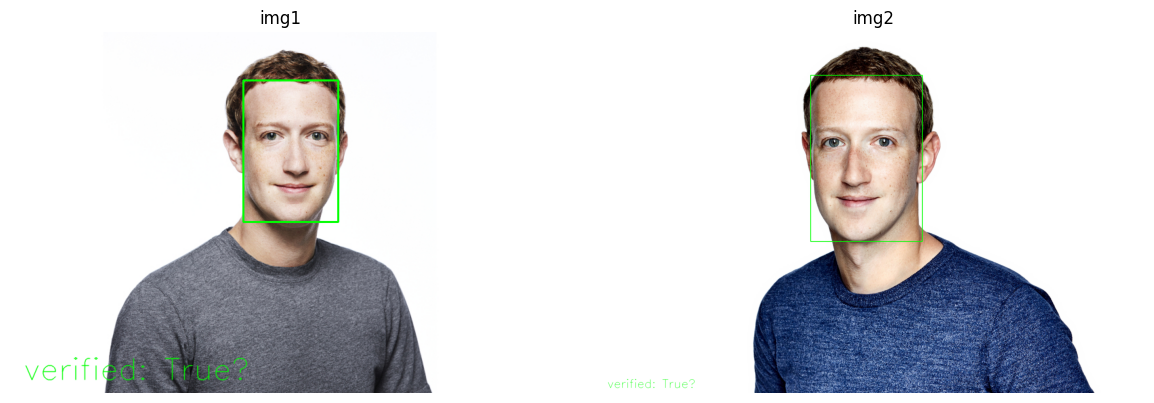

In [34]:
facial_area=obj['facial_areas']
fig, axs = plt.subplots(1, len(facial_area), figsize=(12, 4))

additional_info = {}
for i, (img_name, coords) in enumerate(facial_area.items()):
    img = cv2.imread(globals()[img_name + '_path'])
    cv2.rectangle(img, (coords['x'], coords['y']), (coords['x'] + coords['w'], coords['y'] + coords['h']), (0, 255, 0), 2)
    
    # DeepFace.verify kullanarak bilgileri al
    result = DeepFace.verify(img1_path=img1_path, img2_path=img2_path, model_name='ArcFace', detector_backend='retinaface')
    
    # Bilgileri additional_info sözlüğüne ekle
    additional_info[img_name] = {
        'verified': result['verified']}

    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(img_name)
    axs[i].axis('off')  # Eksenleri kapat

    # Bilgileri resmin altına eklemek için metin oluştur
    text = ""
    for key, value in additional_info[img_name].items():
        text += f"{key}: {value}\n"

    # Metni resmin altına ekleyerek yeni bir resim oluştur
    img_with_text = cv2.putText(img.copy(), text, (20, img.shape[0] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255,0), 1, cv2.LINE_AA)

    # Görüntüyü subplota ekle
    axs[i].imshow(cv2.cvtColor(img_with_text, cv2.COLOR_BGR2RGB))

# Görüntüleri düzenle
plt.tight_layout()

# Görüntüyü göster
plt.show() 